In [79]:
#Keras

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, scale, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from keras.utils import to_categorical
from keras.models import Sequential, Model, load_model
from keras.layers import BatchNormalization
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv1D, MaxPool1D
from keras.optimizers import Adam
# from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras import optimizers
from keras.regularizers import l1
# from keras.utils.vis_utils import plot_model
from datetime import datetime
from sklearn import metrics
import librosa, librosa.display, os, csv
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pylab
plt.switch_backend('agg')
import itertools
import scipy as sp
from scipy import signal
import xgboost as xgb
import joblib
from glob import glob
import urllib
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout
from tensorflow.keras.utils import to_categorical 

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Basic Libraries

import pandas as pd
import numpy as np

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from collections import Counter

from sklearn.preprocessing import MinMaxScaler

In [44]:
df = pd.read_csv('dataset/data_coughvid.csv')
df

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,00014dcc-0f06-4c27-8c7b-737b18a2cf4c,0.291976,1.363884e-03,2115.423692,1658.877752,3808.386230,0.128445,-731.041260,42.723808,-10.931975,...,-2.521698,-2.942381,-3.799997,-1.614732,-3.406964,-3.810765,-4.126310,-1.799356,0.436859,NaN
1,00039425-7f3a-42aa-ac13-834aaa2b6b92,0.139578,1.878941e-02,580.581575,565.623539,1269.462077,0.040964,-548.791992,23.607035,-5.905099,...,-4.456508,1.662166,1.187981,-1.999513,-3.538259,1.217933,-2.029405,0.313285,-0.222258,healthy
2,0007c6f1-5441-40e6-9aaf-a761d8f2da3b,0.424272,1.655443e-03,2955.956285,2342.145646,5439.127604,0.336320,-701.708740,63.574238,6.485413,...,-4.485196,-0.021416,-8.764912,4.290846,-7.062638,1.838892,-3.643069,-3.821728,-1.129667,healthy
3,0009eb28-d8be-4dc1-92bb-907e53bc5c7a,0.398212,9.745415e-02,1911.429901,1952.126824,3917.378030,0.091120,-278.879547,100.888168,-25.865995,...,-3.882203,-0.876595,1.094945,-8.833918,-6.145506,-1.246741,-7.957552,-6.632865,-5.847867,healthy
4,0012c608-33d0-4ef7-bde3-75a0b1a0024e,0.022550,5.592082e-09,152.946054,83.046830,253.712972,0.001483,-1131.370972,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27545,fff30afc-db62-4408-a585-07ca9a254fcc,0.424651,2.936834e-02,2053.318731,1485.171452,3602.325439,0.150721,-483.641846,30.235489,-10.867157,...,-3.109124,0.676318,-3.913574,-2.958206,-2.218795,-3.598296,-1.644838,-0.790633,-1.887344,NaN
27546,fff3ff61-2387-4139-938b-539db01e6be5,0.296978,6.314755e-02,2342.803855,1185.414802,3587.235884,0.136469,-448.928497,31.205355,-55.021175,...,0.775134,-0.113022,-10.139915,-5.493311,2.002908,0.665129,-3.356513,0.218453,1.729817,symptomatic
27547,fff474bf-39a4-4a61-8348-6b992fb5e439,0.190813,3.623098e-03,1114.791141,673.387941,1865.812174,0.084294,-668.422974,16.905182,-12.215397,...,-3.685219,1.137255,-2.930449,-1.987636,-0.244852,-0.967194,-0.704811,-0.450339,0.186000,NaN
27548,fffaa9f8-4db0-46c5-90fb-93b7b014b55d,0.323002,1.331664e-01,1544.185221,1249.501595,2740.797933,0.104723,-265.107819,128.711716,-41.287544,...,-12.103760,5.682563,-14.114423,-8.177466,-0.836036,-12.962152,-6.438088,-1.470852,-6.078249,healthy


## Data Cleaning

In [45]:
df = df.drop(columns=['filename'])
df = df.dropna()
df

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
1,0.139578,0.018789,580.581575,565.623539,1269.462077,0.040964,-548.791992,23.607035,-5.905099,9.216262,...,-4.456508,1.662166,1.187981,-1.999513,-3.538259,1.217933,-2.029405,0.313285,-0.222258,healthy
2,0.424272,0.001655,2955.956285,2342.145646,5439.127604,0.336320,-701.708740,63.574238,6.485413,2.101884,...,-4.485196,-0.021416,-8.764912,4.290846,-7.062638,1.838892,-3.643069,-3.821728,-1.129667,healthy
3,0.398212,0.097454,1911.429901,1952.126824,3917.378030,0.091120,-278.879547,100.888168,-25.865995,15.782073,...,-3.882203,-0.876595,1.094945,-8.833918,-6.145506,-1.246741,-7.957552,-6.632865,-5.847867,healthy
5,0.509781,0.051864,2922.321052,2097.261947,5436.635335,0.315149,-398.467224,51.192245,-56.364231,15.679351,...,-15.086053,-0.618383,-1.894353,-1.785968,-6.449572,7.371781,-4.951817,0.029918,-2.331388,healthy
7,0.292840,0.005203,1768.128171,1355.407430,3034.088135,0.126099,-570.506348,120.099709,-50.214779,-3.935489,...,-14.207401,6.004310,1.847528,-12.045135,-2.809455,-4.131760,-8.008861,-1.847207,-2.242621,COVID-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27542,0.171317,0.028878,854.649914,682.777623,1619.177246,0.057814,-458.692627,30.785349,-10.060508,2.879858,...,-3.861086,-0.125474,-2.260383,-0.215531,-2.351327,1.714213,-1.069260,-1.892883,-3.130551,healthy
27543,0.519430,0.029200,2589.622313,2083.541958,4820.745850,0.206505,-454.915863,46.216866,-24.567057,6.613457,...,-4.790558,6.797791,-7.919979,-2.238501,-2.175852,-8.664407,0.054388,-0.976894,-4.302002,healthy
27544,0.403908,0.028425,3502.748402,2329.620090,6166.072591,0.304898,-440.291473,39.683403,-29.305367,4.427889,...,-10.648251,2.582542,-3.853404,5.723515,-11.760267,1.134321,-6.933490,-0.540571,-5.356250,healthy
27546,0.296978,0.063148,2342.803855,1185.414802,3587.235884,0.136469,-448.928497,31.205355,-55.021175,20.766863,...,0.775134,-0.113022,-10.139915,-5.493311,2.002908,0.665129,-3.356513,0.218453,1.729817,symptomatic


## EDA

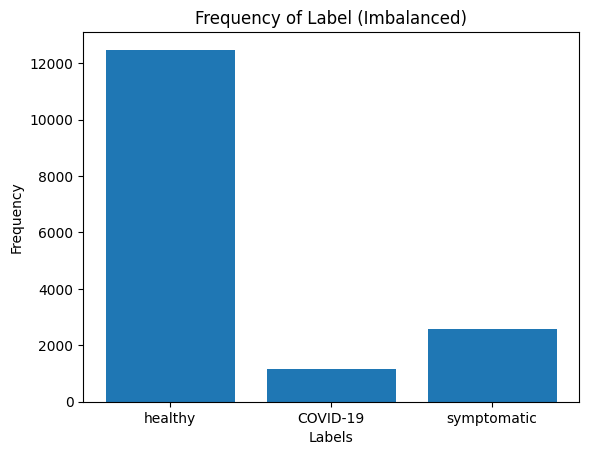

In [46]:
# Label

label_counter = Counter(df['label'])

plt.title('Frequency of Label (Imbalanced)')
plt.bar(label_counter.keys(), label_counter.values())
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.show()

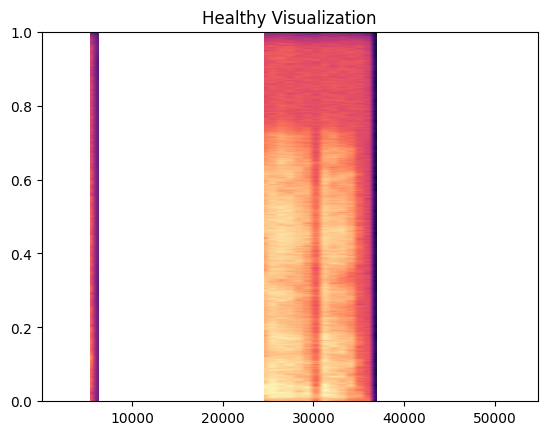

In [47]:
# Wave Visualization

audio_sample_path = 'dataset/data_coughvid_sample/00039425-7f3a-42aa-ac13-834aaa2b6b92.wav'
y,sr = librosa.load(audio_sample_path, mono=True, duration=5)
plt.title("Healthy Visualization")
plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap='magma', sides='default', mode='default', scale='dB')
plt.show()

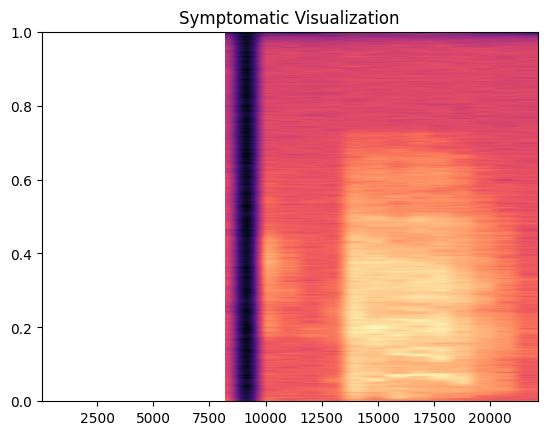

In [48]:
# Wave Visualization

audio_sample_path = 'dataset/data_coughvid_sample/fff3ff61-2387-4139-938b-539db01e6be5.wav'
y,sr = librosa.load(audio_sample_path, mono=True, duration=5)
plt.title("Symptomatic Visualization")
plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap='magma', sides='default', mode='default', scale='dB')
plt.show()

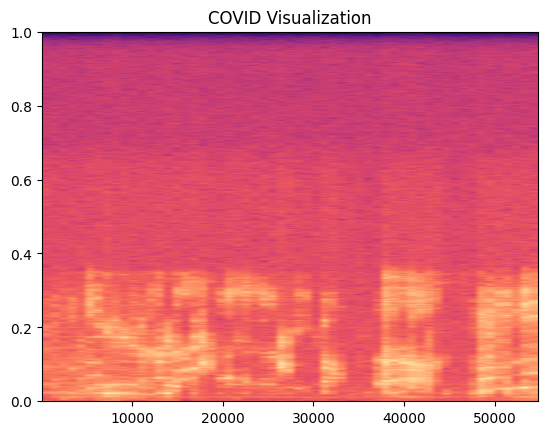

In [49]:
# Wave Visualization

audio_sample_path = 'dataset/data_coughvid_sample/001d8e33-a4af-4edb-98ba-b03f891d9a6c.wav'
y,sr = librosa.load(audio_sample_path, mono=True, duration=5)
plt.title("COVID Visualization")
plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap='magma', sides='default', mode='default', scale='dB')
plt.show()

## Pre-Processing

In [50]:
df['label'].value_counts()

label
healthy        12479
symptomatic     2590
COVID-19        1155
Name: count, dtype: int64

In [51]:
for i in range(0,len(df.iloc[:,-1])):
   if df.iloc[i ,-1] == 'healthy':
       df.iloc[i ,-1] = '0'
   else:
       df.iloc[i ,-1] = '1'
df.head(6)

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
1,0.139578,0.018789,580.581575,565.623539,1269.462077,0.040964,-548.791992,23.607035,-5.905099,9.216262,...,-4.456508,1.662166,1.187981,-1.999513,-3.538259,1.217933,-2.029405,0.313285,-0.222258,0
2,0.424272,0.001655,2955.956285,2342.145646,5439.127604,0.336320,-701.708740,63.574238,6.485413,2.101884,...,-4.485196,-0.021416,-8.764912,4.290846,-7.062638,1.838892,-3.643069,-3.821728,-1.129667,0
3,0.398212,0.097454,1911.429901,1952.126824,3917.378030,0.091120,-278.879547,100.888168,-25.865995,15.782073,...,-3.882203,-0.876595,1.094945,-8.833918,-6.145506,-1.246741,-7.957552,-6.632865,-5.847867,0
5,0.509781,0.051864,2922.321052,2097.261947,5436.635335,0.315149,-398.467224,51.192245,-56.364231,15.679351,...,-15.086053,-0.618383,-1.894353,-1.785968,-6.449572,7.371781,-4.951817,0.029918,-2.331388,0
7,0.292840,0.005203,1768.128171,1355.407430,3034.088135,0.126099,-570.506348,120.099709,-50.214779,-3.935489,...,-14.207401,6.004310,1.847528,-12.045135,-2.809455,-4.131760,-8.008861,-1.847207,-2.242621,1
8,0.094083,0.004550,267.656907,315.147047,546.504720,0.017879,-563.479431,13.822535,0.114158,5.914941,...,-3.014633,-2.406581,-0.436039,-1.085042,-2.185374,-1.310864,-0.790945,-0.715821,-0.834615,0


In [52]:
X = np.array(df.iloc[:, :-1])
Y = np.array(df.iloc[:, -1])

In [53]:
# Spliting

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

In [54]:
# Normalize

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## SMOTE

In [55]:
from multi_imbalance.resampling.mdo import MDO

mdo = MDO()
X_train, y_train = mdo.fit_resample(X_train, y_train)

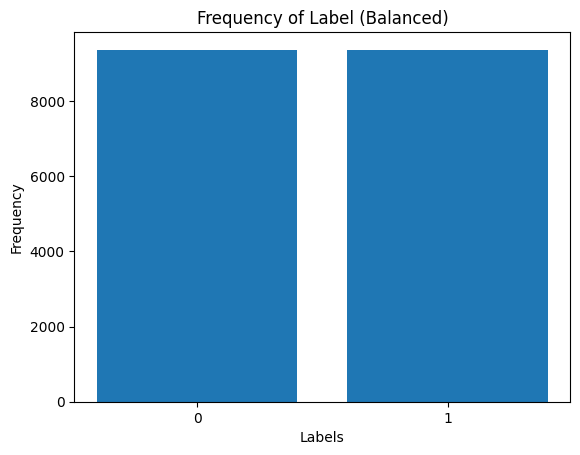

In [56]:
# Label

label_counter = Counter(y_train)

plt.title('Frequency of Label (Balanced)')
plt.bar(label_counter.keys(), label_counter.values())
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.show()

## Modeling

In [57]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

## XGBoost

In [58]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.001],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.1, 0.5, 1.0],
    'reg_lambda': [0.1, 0.5, 1.0]
}

In [61]:
# Initialize XGBoost classifier
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, 
                           scoring='accuracy', cv=3, verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

In [84]:
# import XGBClassifier
from xgboost import XGBClassifier

params = {'max_depth': 3,   # max depth of a tree
            'n_estimators': 200,
            'max_depth': 3,
            'learning_rate': 0.001,
            'subsample': 1,
            'colsample_bytree': 0.6,
            'gamma': 0.1,
            'reg_alpha': 0.1,
            'reg_lambda': 0.1,
            'objective': 'multi:softmax',
            'num_class': 2,     # number of classes to classify in the dataset
            'use_label_encoder':False,
            'random_state': 42,
            'verbosity':2,  #0: silent --> 3: very verbose
        }
xgb_clf = XGBClassifier(**params)

# # fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None, num_class=2,
              num_parallel_tree=None, ...)

In [85]:
y_pred = xgb_clf.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 1]


In [86]:
# check accuracy score
from sklearn.metrics import accuracy_score, classification_report

print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

XGBoost model accuracy score: 0.7253
              precision    recall  f1-score   support

         0.0       0.77      0.92      0.84      3115
         1.0       0.25      0.09      0.14       941

    accuracy                           0.73      4056
   macro avg       0.51      0.50      0.49      4056
weighted avg       0.65      0.73      0.67      4056



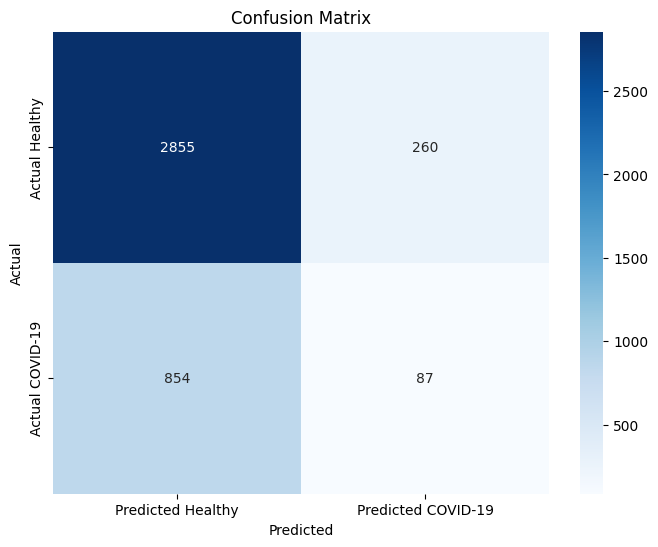

In [87]:
cf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Healthy', 'Predicted COVID-19'], yticklabels=['Actual Healthy', 'Actual COVID-19'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

## Random Forest

In [66]:
param_grid = { 
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9], 
} 

In [67]:
grid_search = GridSearchCV(RandomForestClassifier(), cv=3,
						param_grid=param_grid) 
grid_search.fit(X_train, y_train) 
print(grid_search.best_estimator_) 

In [82]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42, criterion='entropy', max_depth=6, max_features='sqrt', max_leaf_nodes=6, n_estimators=150)
clf.fit(X_train, y_train)

# Predict the Test set results
y_pred = clf.predict(X_test)

# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

Model accuracy score: 0.7236
              precision    recall  f1-score   support

         0.0       0.77      0.91      0.83      3115
         1.0       0.26      0.11      0.15       941

    accuracy                           0.72      4056
   macro avg       0.52      0.51      0.49      4056
weighted avg       0.65      0.72      0.68      4056



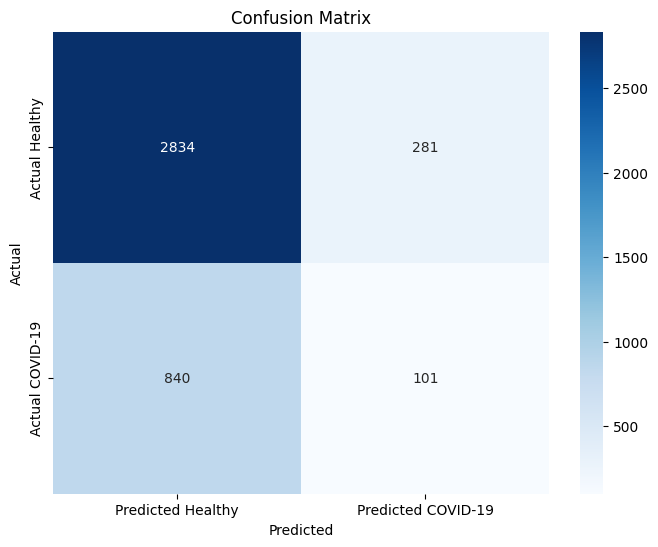

In [83]:
cf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Healthy', 'Predicted COVID-19'], yticklabels=['Actual Healthy', 'Actual COVID-19'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

## DNN

In [70]:
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [71]:
# Construct model

model = Sequential([
    Dense(64, input_shape=(26,), activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, 
                    validation_split=0.2, 
                    epochs=100, 
                    batch_size=32, 
                    callbacks=[early_stopping])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,353 (17.00 KB)

 Trainable params: 4,353 (17.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5726 - loss: 0.7596 - val_accuracy: 0.6642 - val_loss: 0.5720
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - accuracy: 0.7244 - loss: 0.5692 - val_accuracy: 0.7528 - val_loss: 0.4586
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - accuracy: 0.7572 - loss: 0.5235 - val_accuracy: 0.7875 - val_loss: 0.4076
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - accuracy: 0.7646 - loss: 0.5122 - val_accuracy: 0.7832 - val_loss: 0.4033
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - accuracy: 0.7746 - loss: 0.5010 - val_accuracy: 0.8759 - val_loss: 0.2559
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7800 - loss: 0.4899 - val_accuracy: 0.8382 - val_loss: 0.3061
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - accuracy: 0.7776 - loss: 0.4904 - val_accuracy: 0.8788 - val_loss: 0.2394
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - accuracy: 0.7931 - loss: 0.473

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step
Accuracy:               precision    recall  f1-score   support

         0.0       0.77      0.98      0.86      3115
         1.0       0.17      0.01      0.02       941

    accuracy                           0.76      4056
   macro avg       0.47      0.50      0.44      4056
weighted avg       0.63      0.76      0.67      4056



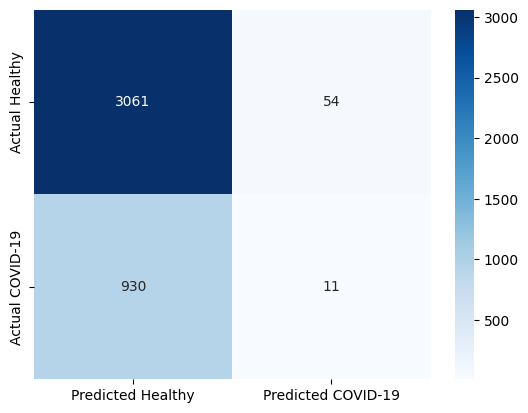

In [72]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print(f"Accuracy: {classification_report(y_test, y_pred)}")

# Display the confusion matrix
disp = confusion_matrix(y_test, y_pred)
sns.heatmap(disp, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Healthy', 'Predicted COVID-19'], yticklabels=['Actual Healthy', 'Actual COVID-19'])
plt.show()

# CNN - 1D

In [73]:
print(X_train.shape, y_train.shape)

(18728, 26) (18728,)


In [74]:
X_train_reshaped = np.expand_dims(X_train, axis=-1)
X_test_reshaped = np.expand_dims(X_test, axis=-1)

y_train_reshaped = np.expand_dims(y_train, axis=-1)
y_test_reshaped = np.expand_dims(y_test, axis=-1)

In [75]:
print(X_train_reshaped.shape, y_train_reshaped.shape)

(18728, 26, 1) (18728, 1)


In [80]:
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(26, 1)),
    BatchNormalization(),
    MaxPool1D(pool_size=2),
    Dropout(0.3),
    
    Conv1D(128, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPool1D(pool_size=2),
    Dropout(0.3),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

# Early stopping to avoid overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, 
                    validation_split=0.2, 
                    epochs=100, 
                    batch_size=32,
                    callbacks = [early_stopping])

# Evaluate the model


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 24, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 24, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 12, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 10, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 10, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 5, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 5, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 640)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 116,097 (453.50 KB)

 Trainable params: 115,713 (452.00 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7020 - loss: 0.7000 - val_accuracy: 0.9301 - val_loss: 0.1782
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7727 - loss: 0.5250 - val_accuracy: 0.9188 - val_loss: 0.1720
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7882 - loss: 0.4948 - val_accuracy: 0.9250 - val_loss: 0.1588
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7859 - loss: 0.4964 - val_accuracy: 0.9298 - val_loss: 0.1326
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7926 - loss: 0.4804 - val_accuracy: 0.9445 - val_loss: 0.0971
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7878 - loss: 0.4888 - val_accuracy: 0.9314 - val_loss: 0.1094
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7960 - loss: 0.4720 - val_accuracy: 0.9471 - val_loss: 0.0924
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7886 - loss: 0.4796 - val_accu

127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Accuracy:               precision    recall  f1-score   support

         0.0       0.77      0.99      0.86      3115
         1.0       0.27      0.01      0.03       941

    accuracy                           0.76      4056
   macro avg       0.52      0.50      0.45      4056
weighted avg       0.65      0.76      0.67      4056



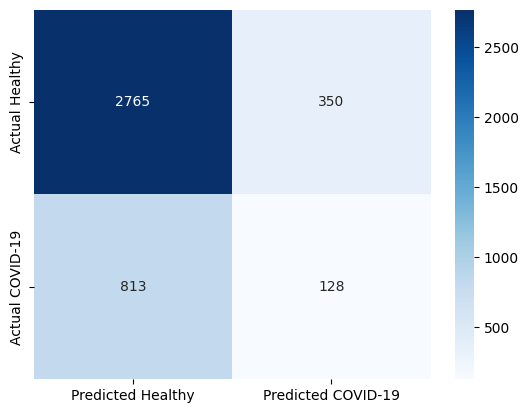

In [81]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print(f"Accuracy: {classification_report(y_test, y_pred)}")

# Display the confusion matrix
disp = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Healthy', 'Predicted COVID-19'], yticklabels=['Actual Healthy', 'Actual COVID-19'])
plt.show()